<html>
<h2>In machine learning, we have two types of parameters:</h2>
<ol>
<li> those that are learned from the training data, [<u>Ex:</u> weights in logistic regression] </li>
<li> tuning or hyper parameters: parameters of learning algorithm that are optimized separately. [<u>Ex:</u> regularization parameter in logistic regression or the depth parameter of a decision tree.]</li>
</ol>

We saw how to use validation_curves to optimize hyper-parameters.In this section, we'll see how to use grid_search for the same.
<h2>Tuning hyperparameters a.k.a Choosing among different values of hyper parameters via grid search:</h2>
It's a brute-force exhaustive search paradigm where we specify a list of values for different hyperparameters, and the computer evaluates the model performance for each combination of those to obtain the optimal set. Using k-fold cross-validation in combination with grid search is a useful approach for fine-tuning the performance of a machine learning model by varying its hyperparameters values as we'll see in the next section below:
</html>

In [15]:
%run '6.1 Model Evaluation and HyperParameter Tuning.ipynb'
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

p = Pipeline([('scl', StandardScaler()),
             ('clf', SVC(random_state=1))])

param_range=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{
        'clf__C': param_range,
        'clf__kernel': ['linear']
    }, {
        'clf__C': param_range,
        'clf__kernel': ['rbf'],
        'clf__gamma': param_range
    }]

# cv = 10 => k-fold with k=10
gs = GridSearchCV(estimator=p, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs.fit(X_train, y_train)
print "GridSearch Results: \nBestScore = %s,\nBestParams= %s" %(gs.best_score_, gs.best_params_)

Done loading data and pipeline
GridSearch Results: 
BestScore = 0.978021978022,
BestParams= {'clf__C': 0.1, 'clf__kernel': 'linear'}


In [19]:
#Estimate test data
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print "Test data accuracy score with grid_search best_estimator: %.3f" %(clf.score(X_test, y_test))

Test data accuracy score with grid_search best_estimator: 0.965


# Note: 
Although grid search is a powerful approach for finding the optimal set of parameters, the evaluation of all possible parameter combinations is also computationally very expensive. An alternative approach to sampling different parameter combinations using scikit-learn is randomized search. Using the <b>RandomizedSearchCV</b> class in scikit-learn, we can draw random parameter combinations from sampling distributions with a specified budget. 

# Choosing among different ML algorithms:
We saw, how to choose among diiferent combinations of hyper-parameters in teh above section. Now let's see how to choose/select among different machine learning algorithms though, another recommended approach is nested cross-validation

<html>
In nested cross-validation:
<ul>
<li> we have an outer k-fold cross-validation loop to split the data into training and test folds and </li>
<li> an inner loop is used to select the model using k-fold cross-validation on the training fold.</li>
<li> After model selection, the test fold is then used to evaluate the model performance.</li>
</ul>
<br/>The following figure explains the concept of nested cross-validation with five outer and two inner folds also known as <b>5x2 cross-validation: </b>
</html>

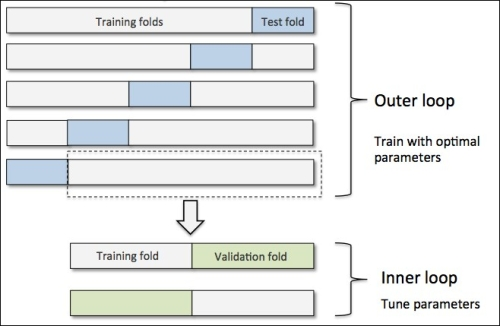

In [21]:
from IPython.display import Image
Image("/Users/surthi/gitrepos/ml-notes/images/nested-cross-validation.jpg")

# SVM vs DecisionTree via k-fold cross validation

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

# SVM
gs = GridSearchCV(estimator=p, 
                  param_grid=param_grid,
                  scoring='accuracy', 
                  cv=5, 
                  n_jobs=-1)
scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


# Decision Tree
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
    scoring='accuracy', 
    cv=5)
scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.977 +/- 0.004
CV accuracy: 0.917 +/- 0.009


# The nested cross-validation performance of the SVM model (97.8 percent) is notably better than the performance of the decision tree (90.8 percent)